In [1]:
import numpy as np

import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import os

#retina matplotlib magic



In [2]:
import healpy as hp

In [3]:
import sys
sys.path.append('../itfgs/')

version = 'born'

from itfgs.params import SOn32 as SOB
from itfgs.params import SOn32Rand as SOBr
from itfgs.params import SOn32PostBorn as SOPB
from itfgs.params import SOn32PostBornRand as SOPBr


## CMB level plots

In [4]:
Simulationsdir = pathlib.Path(os.environ['SCRATCH'])/'SKYSIMS/GIULIOSIMS/'

In [5]:
keyB = 'NL Born'
keyBr = 'NL Born Rand'
keyPB = 'NL Post-Born'
keyPBr = 'NL Post-Born Rand'

In [6]:
SOdict = {keyB: SOB, keyPB: SOPB, keyBr: SOBr, keyPBr: SOPBr}

In [7]:
tlm_maps = {k: SO_.sims_cmb_len.get_sim_tlm(0) for k, SO_ in SOdict.items()}

In [8]:
cls_len = SOB.cls_len
cls_unl = SOB.cls_unl
cls_grad = SOB.cls_grad
tt = cls_len['tt']
pp = cls_unl['pp']

In [9]:
class Config(object):
    def __init__(self, cls_unl, cls_len, cls_weight, nlev_t = 7., beam = 1.7, lmax_qlm = 4000, lminrec = 100, lmaxrec = 3500):

        self.nlev_t = nlev_t
        self.nlev_p = np.sqrt(2)*self.nlev_t
        self.beam = beam

        self.lmin_tlm = lminrec
        self.lmax_ivf = lmaxrec

        self.lmax_qlm = lmax_qlm

        self.cls_unl = cls_unl
        self.cls_len = cls_len
        self.cls_weight = cls_weight


SO = Config(cls_unl, cls_len, cls_grad)
qe_key = 'ptt'
nlev_t = SO.nlev_t
nlev_p = SO.nlev_p
beam_fwhm = SO.beam
cls_unl_fid = SO.cls_unl
lmin_cmb, lmax_cmb = SO.lmin_tlm, SO.lmax_ivf
lmax_qlm = SO.lmax_qlm

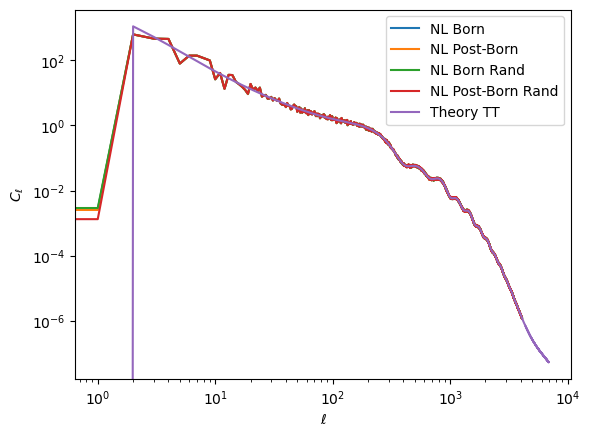

In [10]:
for k, tlm in tlm_maps.items():
    plt.loglog(hp.alm2cl(tlm), label = k)
plt.loglog(tt, label = 'Theory TT')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

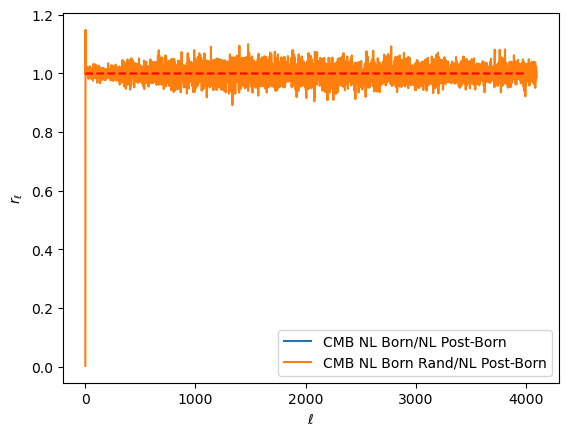

In [11]:
plt.plot(hp.alm2cl(tlm_maps[keyB])/hp.alm2cl(tlm_maps[keyPB]), label = f'CMB {keyB}/{keyPB}')

plt.plot(hp.alm2cl(tlm_maps[keyBr])/hp.alm2cl(tlm_maps[keyPB]), label = f'CMB {keyBr}/{keyPB}')
#plt.loglog(hp.alm2cl(tlm_maps[keyPBr])/hp.alm2cl(tlm_maps[keyPB]), label = f'CMB {keyPBr}/{keyPB}')


plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
plt.ylabel(r'$r_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

## Plot QE reconstruction

In [12]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [13]:
input_plm_maps = {k: SO_.sims_cmb_len.get_sim_plm(0) for k, SO_ in SOdict.items()}

In [14]:
from lenscarf.iterators import statics

plms_QE_dict = {k: np.load(f'{SO_.TEMP}/ptt_sim0000{version}/normalized_phi_plm_it000.npy') for k, SO_ in SOdict.items()}

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

In [15]:
plm_in_ins = {k: palm_copy(d, lmax = SOdict[k].lmax_phi) for k, d in input_plm_maps.items()} #GF input postborn + NL map
auto_in = {k: hp.alm2cl(plm_in) for k, plm_in in plm_in_ins.items()}

In [16]:
crosses_dict =  {k: hp.alm2cl(plms_QE_dict[k], plm_in) for k, plm_in in plm_in_ins.items()}

/tmp/ipykernel_39339/2903204442.py:2: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
/tmp/ipykernel_39339/2903204442.py:3: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')
/tmp/ipykernel_39339/2903204442.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')
/tmp/ipykernel_39339/2903204442.py:8: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


Text(0, 0.5, '$r_L$')

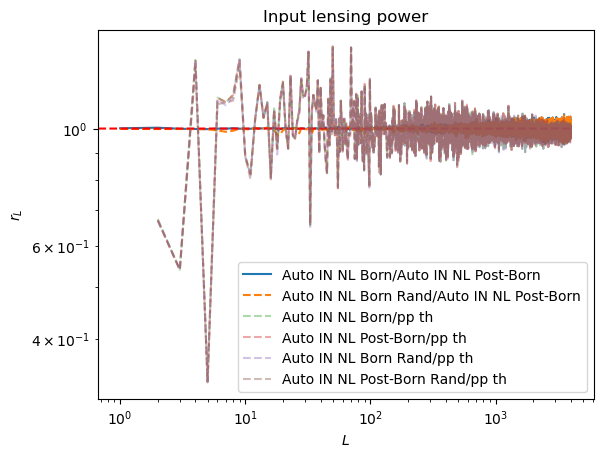

In [17]:
plt.title('Input lensing power')
plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

for k, auto in auto_in.items():
    plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$r_L$')

Text(0, 0.5, '$C_L$')

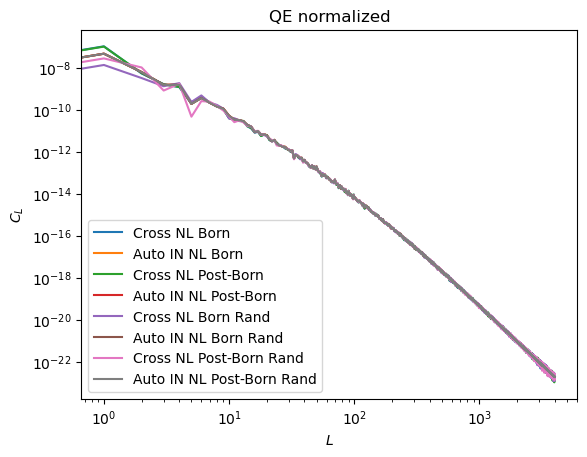

In [18]:
plt.title('QE normalized')

for k, autoin in auto_in.items():
    plt.loglog(crosses_dict[k], label = f'Cross {k}')
    plt.loglog(autoin, label = f'Auto IN {k}')

plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$C_L$')

In [19]:
auto =  {k: hp.alm2cl(plms, plms) for k, plms in plms_QE_dict.items()}

/tmp/ipykernel_39339/1341853639.py:3: RuntimeWarning: invalid value encountered in divide
  rho = {k: cross/np.sqrt(auto_in[k]*auto[k]) for k, cross in crosses_dict.items()}


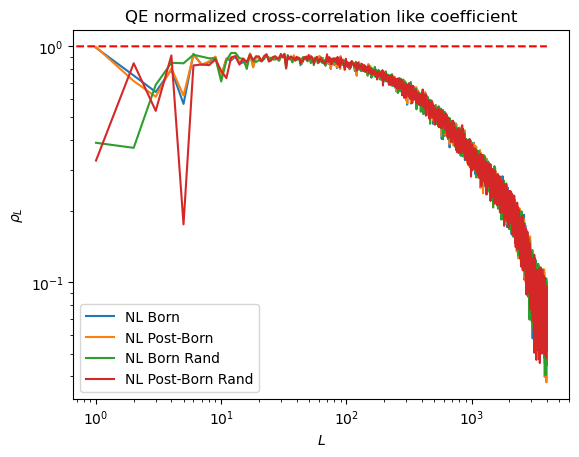

In [20]:
plt.title('QE normalized cross-correlation like coefficient')

rho = {k: cross/np.sqrt(auto_in[k]*auto[k]) for k, cross in crosses_dict.items()}


for k, rho in rho.items():
    plt.loglog(rho, label = f'{k}')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

plt.xlabel(r'$L$')
plt.ylabel(r'$\rho_L$')

plt.legend()

## Iterative Reconstruction

In [21]:
from lenscarf.iterators import statics

In [22]:
iters = [0, 1]

In [23]:
plms_dict = {k: statics.rec.load_plms(f'{SO_.TEMP}/ptt_sim0000{version}', iters) for k, SO_ in SOdict.items()}


/tmp/ipykernel_39339/1706209759.py:15: RuntimeWarning: invalid value encountered in divide
  rhos_list = [c_/np.sqrt(a_*auto_in_temp) for c_, a_ in zip(cs_, as_)]


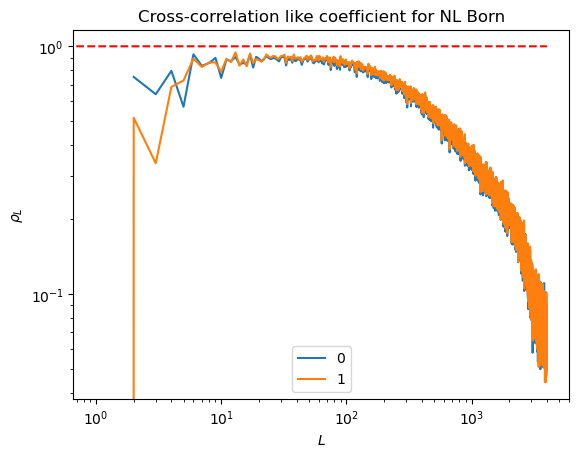

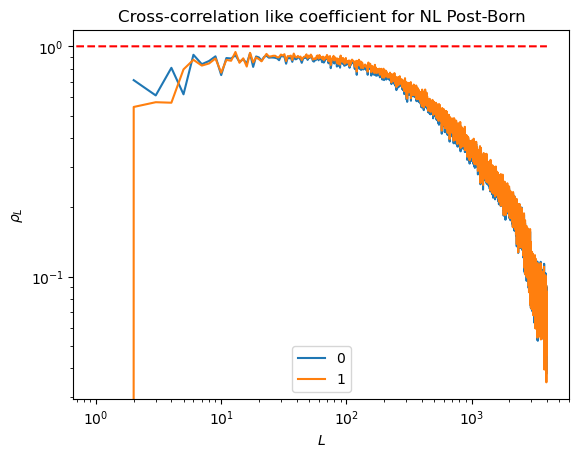

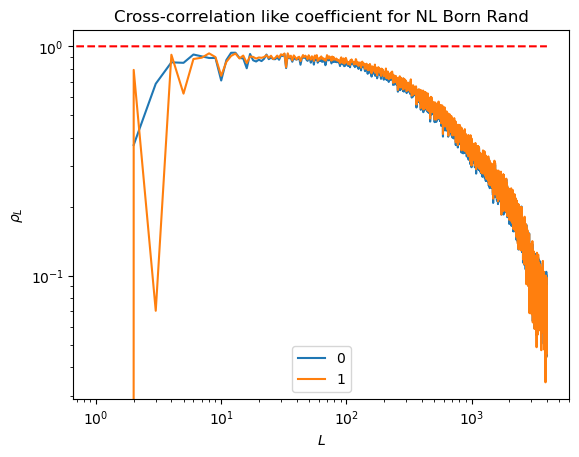

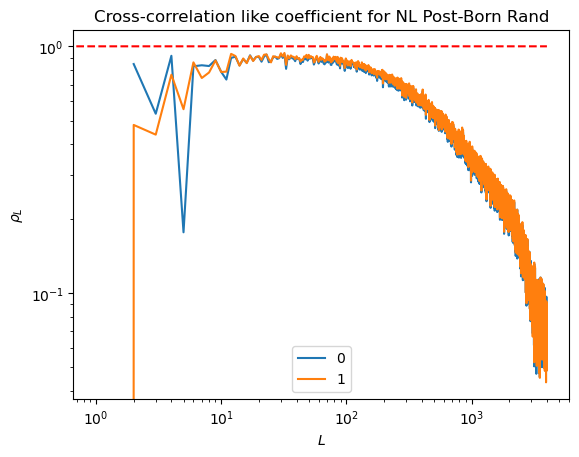

In [24]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}

for k, plms in plms_dict.items():
    auto_in_temp = auto_in[k]
    cs_ = [hp.alm2cl(plm_, plm_in_ins[k]) for plm_ in plms]
    as_ = [hp.alm2cl(plm_) for plm_ in plms]
    
    crosses_dict[k] = cs_
    autos_dict[k] = as_
    autos_in_dict[k] = auto_in_temp

    rhos_list = [c_/np.sqrt(a_*auto_in_temp) for c_, a_ in zip(cs_, as_)]
    rho_iters_dict[k] = rhos_list

colors = []
for k, rhos in rho_iters_dict.items():
    plt.title(f'Cross-correlation like coefficient for {k}')
    [plt.loglog(rho, label = f'{i}') for i, rho in enumerate(rhos)]
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\rho_L$')
    plt.legend()
    plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.show()

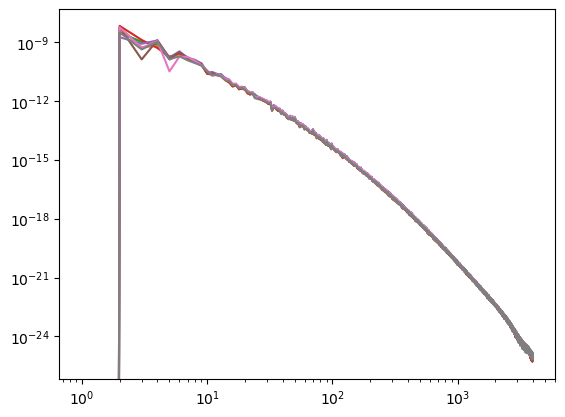

In [25]:
for k, c in crosses_dict.items():
    for c_ in c:
        plt.loglog(c_)

## Check Normalization

### N0 contribution

In [26]:
from plancklens import n0s
#checking theory dependence on noise and beam
n0iter = n0s.get_N0_iter(qe_key = qe_key, nlev_t = nlev_t, nlev_p = nlev_p, beam_fwhm = beam_fwhm, 
                    cls_unl_fid = cls_unl_fid, lmin_cmb = lmin_cmb, lmax_cmb = lmax_cmb, itermax = max(iters), lmax_qlm = lmax_qlm, ret_delcls = True)

 [00:00:04]  -----> 50%


In [27]:
N0sb, N0sunb, Resp, cls_plen, cls_plen_true, _  = n0iter

In [28]:
from plancklens import qresp
from lenscarf.utils_hp import gauss_beam
from lenscarf.utils import cli


transf_tlm   =  gauss_beam(SO.beam/180 / 60 * np.pi, lmax=SO.lmax_ivf) * (np.arange(SO.lmax_ivf + 1) >= lmin_cmb)
ftl =  cli(cls_len['tt'][:SO.lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)

ftlu =  cli(cls_unl['tt'][:SO.lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)

R = qresp.get_response('ptt', lmax_cmb, 'p', SO.cls_len, SO.cls_weight, {'e': ftl*0., 'b': ftl*0., 't': ftl}, lmax_qlm=SO.lmax_qlm)[0]

In [29]:
clppfid = cls_unl['pp'][0:len(auto_in_temp)]

/tmp/ipykernel_39339/3565291942.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_39339/3565291942.py:8: RuntimeWarning: invalid value encountered in divide
  WL = clppfid/(clppfid+n0calculated+n1calculated)


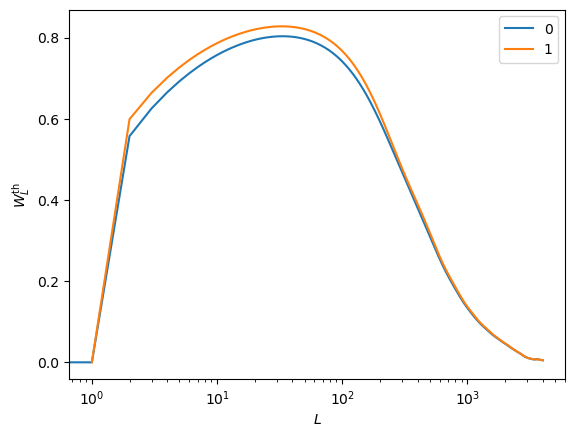

In [30]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    #n1calculated = n0iter[0][0]**2.*n1_tt if itr == 0 else 0
    n1calculated = 0
    WL = clppfid/(clppfid+n0calculated+n1calculated)
    #color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label = f'{itr}')
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'$W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

In [31]:
from plancklens.n1 import n1 as n1s

In [32]:
N0s, N0s_unbiased, Response, delcls_fid, delcls_true, fals = n0iter

In [33]:
lib_dir = '/global/cscratch1/sd/omard//n1TTiterativeGiulio'

n1_tts_dict = {}

n1_tts = []
n1_tts_extra = []
itermax = max(iters)+1
key = 'ptt'

for i in range(itermax):
    lib_dir_ = lib_dir+f"{i}"
    n1lib = n1s.library_n1(lib_dir_, delcls_fid[i]['tt'], delcls_fid[i]['te'], delcls_fid[i]['ee'], SO.lmax_qlm,  dL = 10, lps = None)
    ftl = fals[i]['tt']
    fel = fals[i]['tt']
    fbl = fals[i]['tt']
    #ppres = 1/(1/Response[i]+1/pp)
    n1_tt, n1_tt_extra = n1lib.get_n1(key, 'p', delcls_fid[i]['pp'], ftl, fel, fbl, SO.lmax_qlm)
    n1_tts += [n1_tt]



n1: doing L 1 kA ptt kB ptt kind p
n1: doing L 2 kA ptt kB ptt kind p
n1: doing L 3 kA ptt kB ptt kind p
n1: doing L 4 kA ptt kB ptt kind p
n1: doing L 5 kA ptt kB ptt kind p
n1: doing L 6 kA ptt kB ptt kind p
n1: doing L 7 kA ptt kB ptt kind p
n1: doing L 8 kA ptt kB ptt kind p
n1: doing L 9 kA ptt kB ptt kind p
n1: doing L 10 kA ptt kB ptt kind p
n1: doing L 21 kA ptt kB ptt kind p
n1: doing L 41 kA ptt kB ptt kind p
n1: doing L 61 kA ptt kB ptt kind p
n1: doing L 81 kA ptt kB ptt kind p
n1: doing L 101 kA ptt kB ptt kind p
n1: doing L 121 kA ptt kB ptt kind p
n1: doing L 141 kA ptt kB ptt kind p
n1: doing L 161 kA ptt kB ptt kind p
n1: doing L 181 kA ptt kB ptt kind p
n1: doing L 201 kA ptt kB ptt kind p
n1: doing L 221 kA ptt kB ptt kind p
n1: doing L 241 kA ptt kB ptt kind p
n1: doing L 261 kA ptt kB ptt kind p
n1: doing L 281 kA ptt kB ptt kind p
n1: doing L 301 kA ptt kB ptt kind p
n1: doing L 321 kA ptt kB ptt kind p
n1: doing L 341 kA ptt kB ptt kind p
n1: doing L 361 kA ptt k

AssertionError: 

In [41]:
Lmax = SO.lmax_qlm
Ls = np.arange(1, Lmax + 1)

/tmp/ipykernel_39339/921247992.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_39339/921247992.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tt
/tmp/ipykernel_39339/921247992.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tt
/tmp/ipykernel_39339/921247992.py:12: RuntimeWarning: invalid value encountered in divide
  WL2 = clppfid/(clppfid+n0calculated)


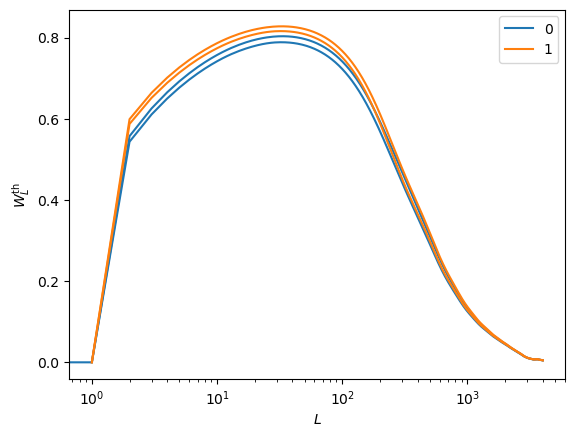

In [44]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    
    #n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1/Response[itr]**2.*n1_tt

    WL = clppfid/(clppfid+n0calculated+n1calculated)

    WL2 = clppfid/(clppfid+n0calculated)

    #color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label = f'{itr}')
    plt.plot(WL2, color = p[0].get_color())
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'$W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

In [ ]:
n1calculated = n0iter[0][0]**2.*n1_tts[iters.index(itr)]

## Correcting with theory normalization

/tmp/ipykernel_39339/3532524075.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(cross_element/wfs_th[it]/autoin_, label = it)
/tmp/ipykernel_39339/3532524075.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(cross_element/wfs_th[it]/autoin_, label = it)


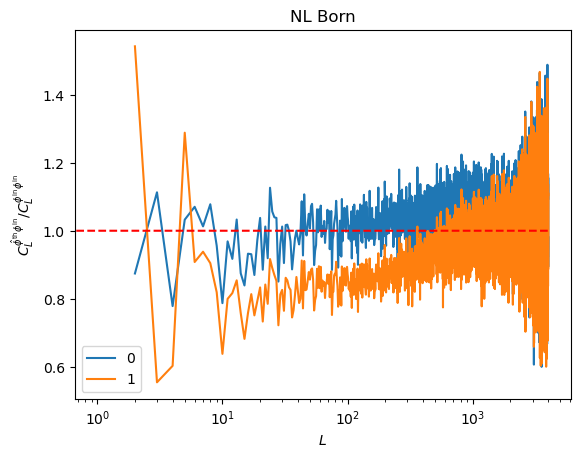

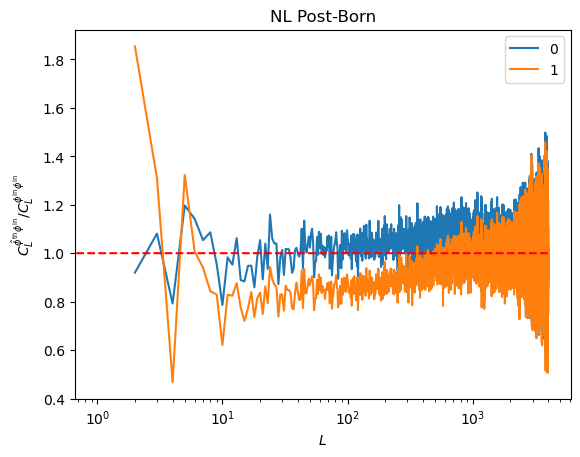

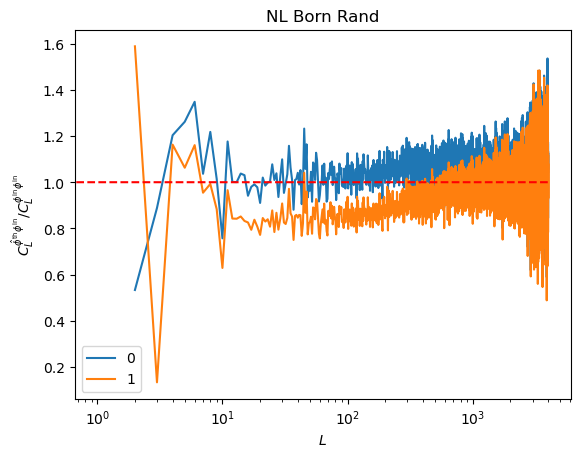

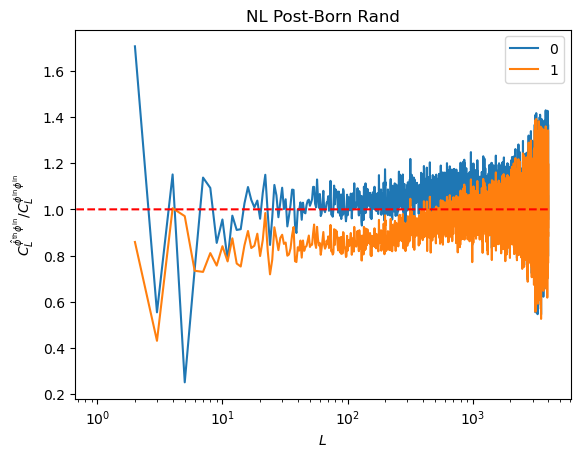

In [45]:
for k, cross_ in crosses_dict.items():
    autoin_ = autos_in_dict[k]
    plt.title(f"{k}")
    for it, cross_element in enumerate(cross_):
        plt.plot(cross_element/wfs_th[it]/autoin_, label = it)
    plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.xlabel(r'$L$')
    plt.ylabel(r'$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
    plt.xscale('log')
    plt.legend()
    plt.show()

/tmp/ipykernel_31645/3532524075.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(cross_element/wfs_th[it]/autoin_, label = it)
/tmp/ipykernel_31645/3532524075.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(cross_element/wfs_th[it]/autoin_, label = it)


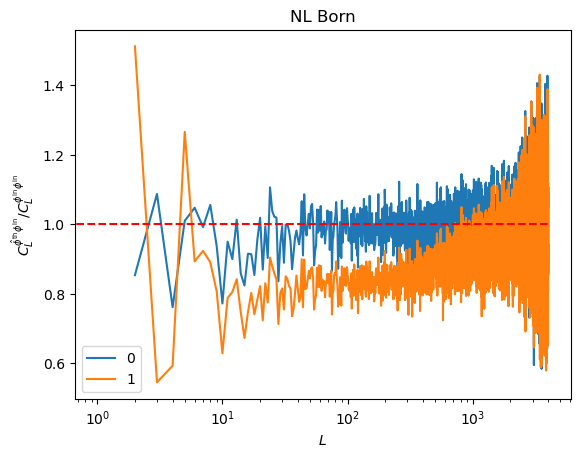

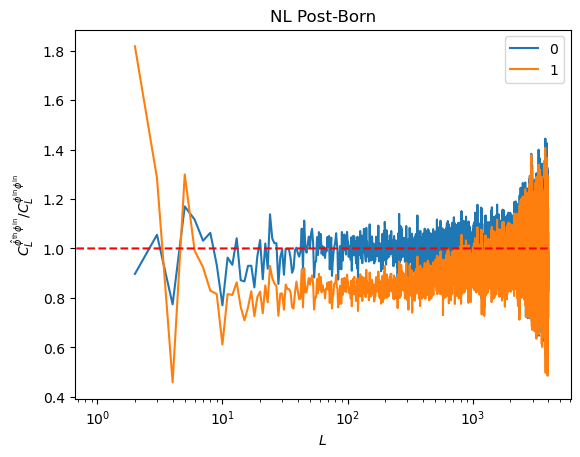

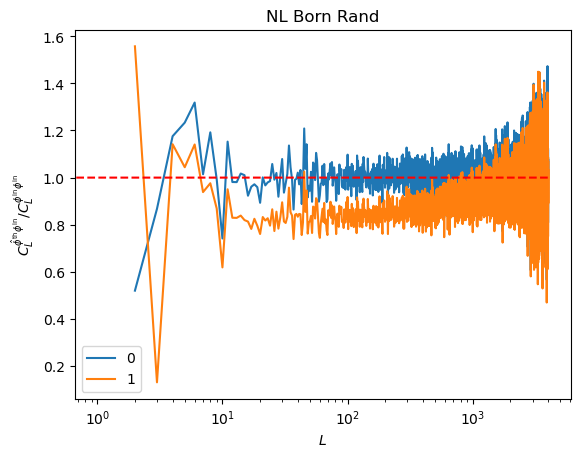

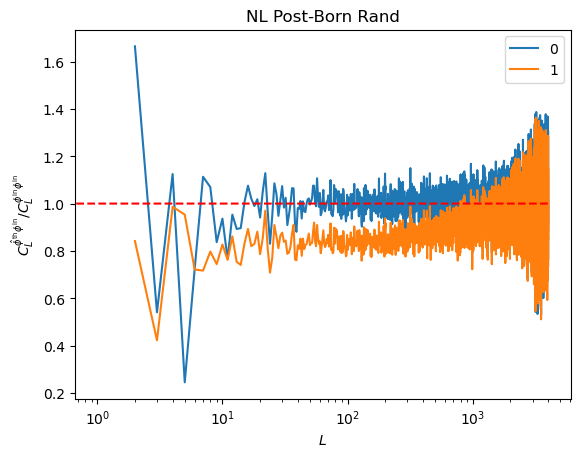

In [44]:
for k, cross_ in crosses_dict.items():
    autoin_ = autos_in_dict[k]
    plt.title(f"{k}")
    for it, cross_element in enumerate(cross_):
        plt.plot(cross_element/wfs_th[it]/autoin_, label = it)
    plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.xlabel(r'$L$')
    plt.ylabel(r'$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [ ]:
theoryNorm = 

In [ ]:
norms = {}


In [ ]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}